# Parameter Search for Beta and Gamma values

**Author: Veronica Scerra**  
**Last Updated: 2025-10-11**

**Purpose:**
Adding a clean and reusable grid search + visualization utility so we can sweep over beta and gamma values, compute summary stats, and plot heatmaps/contours of outcomes

**Inputs & Dependencies:**
- Code: `src/epimodels/sir.py`  
- Libraries: `numpy`, `matplotlib`, `pandas`  
- No external data required.

**Outputs:**
- grid_sweeps of variables
- Heatmaps
- Contour plots
- Optional CSV export: `../data/sir_grid_results.csv`

**Context:**
Second notebook in the **SIR Model Project**, serving as a means for visualizing the effects of varying parameter values

### Import paths and dependencies

In [1]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ensure src is importable
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from epimodels.experiments import grid_sweep, heatmap, contour

### Define the grid and run a sweep

In [2]:
# population and initial conditions
N = 10000
I0 = 10

# time grid (days)
T = 160
t = np.linspace(0, T, T+1)

# parameter grids
betas = np.linspace(0.10, 0.50, 9) # contact/transmission rates per day
gammas = np.linspace(0.05, 0.30, 6) # recovery rate per day

df = grid_sweep(betas=betas, gammas=gammas, N=N, I0=I0, t=t)
df.head()

,beta,gamma,R0,peak_day,peak_infected,peak_prevalence,final_size,max_incidence
0,0.1,0.05,2.000000,135.0,1539.253942,0.153925,0.524603,87.904222
1,0.1,0.10,1.000000,0.0,10.000000,0.001000,0.015236,0.998898
2,0.1,0.15,0.666667,0.0,10.000000,0.001000,0.002987,0.974339
3,0.1,0.20,0.500000,0.0,10.000000,0.001000,0.001997,0.950580
4,0.1,0.25,0.400000,0.0,10.000000,0.001000,0.001665,0.927591


#### Save grid results

In [4]:
out_path = os.path.abspath(os.path.join('..', 'data', 'sir_grid_results.csv'))
df.to_csv(out_path, index = False)
out_path

'c:\\Users\\vscerra\\Desktop\\DataScienceProjects\\sir_model_project\\data\\sir_grid_results.csv'

### Heatmaps

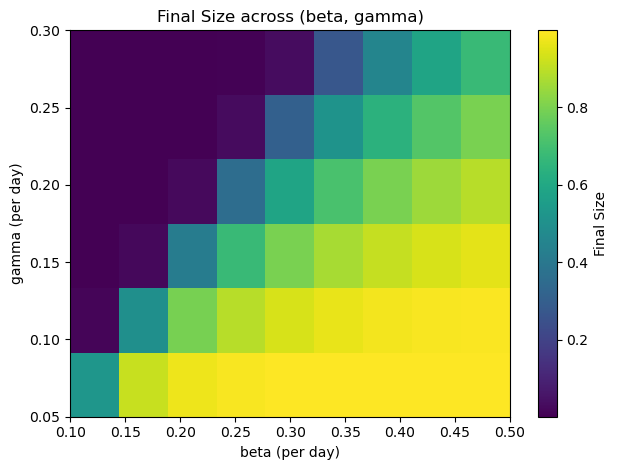

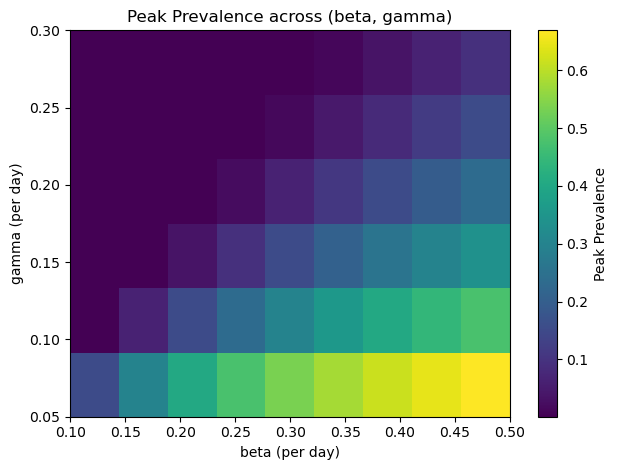

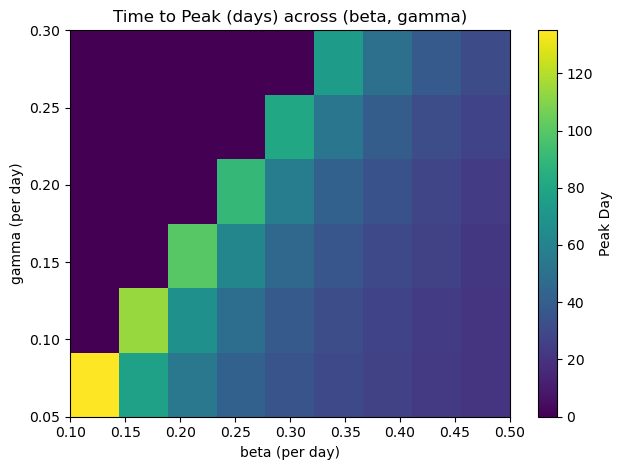

In [3]:
# final epidemic size (attack rate)
heatmap(df, x='beta', y='gamma', value='final_size', title='Final Size across (beta, gamma)', xlabel='beta (per day)', ylabel='gamma (per day)')

# peak prevalence
heatmap(df, x='beta', y='gamma', value='peak_prevalence', title='Peak Prevalence across (beta, gamma)', xlabel='beta (per day)', ylabel='gamma (per day)')

# time to peak
heatmap(df, x='beta', y='gamma', value='peak_day', title='Time to Peak (days) across (beta, gamma)', xlabel='beta (per day)', ylabel='gamma (per day)')

### Contour Plots

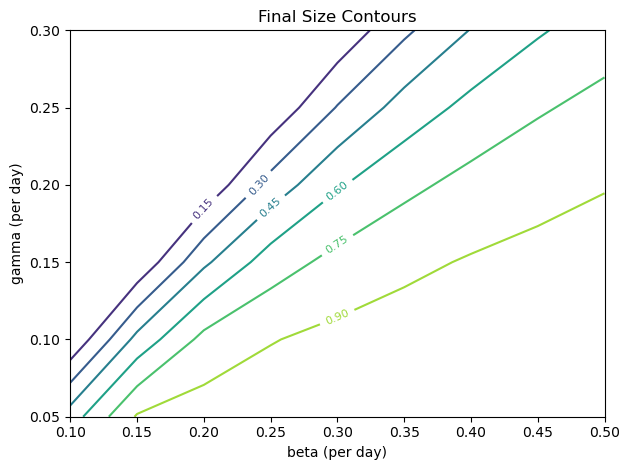

In [4]:
# contours of R0 are trivial (R0=beta/gamma), but here are the countours for final size
contour(df, x='beta', y='gamma', value='final_size', levels=8, title='Final Size Contours', xlabel='beta (per day)', ylabel='gamma (per day)')

### Inspect the regimes 

In [7]:
# High final size scenarios
df.sort_values('final_size', ascending=False).head(10)



,beta,gamma,R0,peak_day,peak_infected,peak_prevalence,final_size,max_incidence
48,0.50,0.05,10.0,21.0,6691.770818,0.669177,0.999208,1064.348249
42,0.45,0.05,9.0,23.0,6448.407283,0.644841,0.999043,944.305191
36,0.40,0.05,8.0,26.0,6150.942884,0.615094,0.998698,825.376981
30,0.35,0.05,7.0,30.0,5788.962555,0.578896,0.997894,702.517511
24,0.30,0.05,6.0,35.0,5347.873205,0.534787,0.995863,578.176856
49,0.50,0.10,5.0,21.0,4781.586891,0.478159,0.993028,906.823649
18,0.25,0.05,5.0,42.0,4781.654820,0.478165,0.990373,454.026074
43,0.45,0.10,4.5,24.0,4435.243977,0.443524,0.988300,781.339664
37,0.40,0.10,4.0,27.0,4035.947102,0.403595,0.980190,659.312379
12,0.20,0.05,4.0,54.0,4035.962382,0.403596,0.974132,330.705849


In [8]:
# low final size scenarios
df.sort_values('final_size', ascending=True).head(10)

,beta,gamma,R0,peak_day,peak_infected,peak_prevalence,final_size,max_incidence
5,0.10,0.30,0.333333,0.0,10.0,0.001,0.001499,0.905341
4,0.10,0.25,0.400000,0.0,10.0,0.001,0.001665,0.927591
3,0.10,0.20,0.500000,0.0,10.0,0.001,0.001997,0.950580
11,0.15,0.30,0.500000,0.0,10.0,0.001,0.001997,1.391318
10,0.15,0.25,0.600000,0.0,10.0,0.001,0.002493,1.425798
2,0.10,0.15,0.666667,0.0,10.0,0.001,0.002987,0.974339
17,0.20,0.30,0.666667,0.0,10.0,0.001,0.002988,1.900967
9,0.15,0.20,0.750000,0.0,10.0,0.001,0.003969,1.461433
16,0.20,0.25,0.800000,0.0,10.0,0.001,0.004940,1.948476
23,0.25,0.30,0.833333,0.0,10.0,0.001,0.005897,2.435467


In [9]:
# add an explicit R0 threshold flag
df_eval = df.assign(R0_flag=(df['R0'] > 1.0))
df_eval['R0_flag'].value_counts()

R0_flag
True     40
False    14
Name: count, dtype: int64